# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:

**Note: if you are using the Udacity workspace, you *DO NOT* need to re-download these - they can be found in the `/data` folder as noted in the cell below.**

* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob

In [2]:
# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

In [3]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline       

Number of faces detected: 1


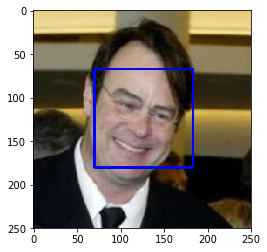

In [4]:
# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [5]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)

In [6]:
from tqdm import tqdm

In [7]:
human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#


In [8]:
face_count_human=0

for human_file in human_files_short:
    if face_detector(human_file):
        face_count_human+=1

face_count_dog=0

for dog_file in dog_files_short:
    if face_detector(dog_file):
        face_count_dog+=1
        
human_percent=face_count_human/len(human_files_short)
dog_percent=face_count_dog/len(dog_files_short)      
print("Human faces:",100*human_percent,"percent")
print("Dog faces:",100*dog_percent,"percent")

Human faces: 98.0 percent
Dog faces: 17.0 percent


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [9]:
### (Optional) 
### DO: Test performance of another face detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [10]:
import torch
import torchvision.models as models

In [11]:
# define VGG16 model
VGG16 = models.vgg16(pretrained=True)
VGG16.eval()
# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:05<00:00, 99566007.07it/s] 


Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [12]:
from PIL import Image
import torchvision.transforms as transforms

In [13]:
## Had some issues with non-determenistic results.
#cudnn.deterministic = True
#random.seed(1)
#np.random.seed(1)
#torch.manual_seed(1)
#torch.cuda.manual_seed(1)

if use_cuda:
    VGG16 = VGG16.cuda()

def VGG16_predict(img_path, use_cuda):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## DO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    
    data_transform = transforms.Compose([transforms.Resize((224,224)), 
                                      transforms.ToTensor()])
    
    in_data_dirty=Image.open(img_path)#.convert('L')
    in_data=data_transform(in_data_dirty).unsqueeze(dim=0)
    
    
    if use_cuda:
        in_data=in_data.cuda()
    
    scores=VGG16(in_data) #scores
    res=torch.argmax(scores) #predicted class index
    
    return res#

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [14]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    
    pred_class=VGG16_predict(img_path, use_cuda)
    return (150<pred_class) and (pred_class<269)

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 


In [15]:
face_count_human=0

for human_file in human_files_short:
    if dog_detector(human_file):
        face_count_human+=1

face_count_dog=0

for dog_file in dog_files_short:
    if dog_detector(dog_file):
        face_count_dog+=1
        
human_percent=face_count_human/len(human_files_short)
dog_percent=face_count_dog/len(dog_files_short)      
print("Human faces:",100*human_percent,"percent")
print("Dog faces:",100*dog_percent,"percent")

Human faces: 0.0 percent
Dog faces: 97.0 percent


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [16]:
### (Optional) 
### DO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [17]:
import os
from torchvision import datasets

from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

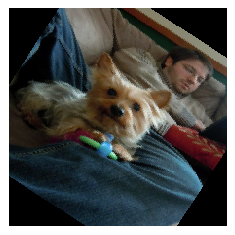

In [20]:
### DO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

loaders_scratch=dict()


## Alternative/scratchwork transforms.

#data_transform = transforms.Compose([transforms.Resize((256,256)), transforms.ToTensor(),
       #   transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225]) ])                 

transform_train = transforms.Compose([transforms.Resize((224,224)),transforms.RandomRotation(degrees=45),transforms.ToTensor(),
   transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225]) ])

transform_valtest = transforms.Compose([transforms.Resize((224,224)),transforms.ToTensor(),
   transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225]) ])
             
## Training
data_dir_train = '/data/dog_images/train'
dataset_train = datasets.ImageFolder(data_dir_train, transform=transform_train)

loaders_scratch["train"]= torch.utils.data.DataLoader(dataset_train, batch_size=32, shuffle=True)


##Validation
data_dir_val = '/data/dog_images/valid'
dataset_val = datasets.ImageFolder(data_dir_val, transform=transform_valtest)

loaders_scratch["valid"]= torch.utils.data.DataLoader(dataset_val, batch_size=32, shuffle=False)


##Test
data_dir_test = '/data/dog_images/test'
dataset_test = datasets.ImageFolder(data_dir_test, transform=transform_valtest)

loaders_scratch["test"]= torch.utils.data.DataLoader(dataset_test, batch_size=32, shuffle=False)

# Run this to test your data loader
## imshow for tensors aka Udacity's "helper"

def imshow(image, ax=None, title=None, normalize=True):
  """Imshow for Tensor."""
  if ax is None:
      fig, ax = plt.subplots()
  image = image.numpy().transpose((1, 2, 0))

  if normalize:
      mean = np.array([0.485, 0.456, 0.406])
      std = np.array([0.229, 0.224, 0.225])
      image = std * image + mean
      image = np.clip(image, 0, 1)

  ax.imshow(image)
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.spines['left'].set_visible(False)
  ax.spines['bottom'].set_visible(False)
  ax.tick_params(axis='both', length=0)
  ax.set_xticklabels('')
  ax.set_yticklabels('')

  return ax
images, labels = next(iter(loaders_scratch["train"]))
imshow(images[0], normalize=True)




**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:

- I tried cropping it was bad. I use resize. Input is made into 224 by 224 pixels -- both because it seems like a reasonable size, and because I can then use the same setup for transfer learning with VGG16 (which takes this size input). 

- I use rotation by a random angle up to 45 degrees. I started out without it, but the model was overfitting. It seems to have helped.  

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [21]:
import torch.nn as nn
import torch.nn.functional as F

In [22]:
# define the CNN architecture
class Net(nn.Module):
    ### TDO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        # convolutional layer (sees 224x224x3 image tensor)
        self.conv1 = nn.Conv2d(3, 16, 3, padding=3)
        # convolutional layer (sees 56x56x16 tensor)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=2)
        # convolutional layer (sees 14x14x32 tensor)
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        # max pooling layer
        self.pool = nn.MaxPool2d(4, 4)
        self.pool2 = nn.MaxPool2d(2, 2)
        # linear layer (64 * 7 * 7 -> 64)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        # linear layer (133-> 133)
        self.fc2 = nn.Linear(128, 133)
        # dropout layer (p=0.25)
        self.dropout = nn.Dropout(0.35)
    
    def forward(self, x):
        # add sequence of convolutional and max pooling layers
        x = self.pool(F.relu(self.conv1(x)))
        
        x = self.pool(F.relu(self.conv2(x)))
      
        x = self.pool2(F.relu(self.conv3(x)))
        # flatten image input
        x = x.view(-1, 64 * 7 * 7)
        # add dropout layer
        x = self.dropout(x)
        # add 1st hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        # add dropout layer
        x = self.dropout(x)
        # add 2nd hidden layer, with relu activation function
        x = self.fc2(x)
        return x

#-#-# You do NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()



__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__  I started with more-or-less the architecture from the lecture (cifar10_cnn_exercise) but making more agressive maxpools (4 by 4 instead of 2 by 2), to account for larger input size. I tried different fully connected hidden layer size. Initially I misinterpreted my results and tought I had capacity problems, so I tried a much larger network version (2 by 2 maxpools, and larger filters); that did not work too well. But then I notices that train loss was going down in the small model, so it was learning ok, just overfitting. I tried changing the hidden layer size but that had limited (and mostly negative) effect. Since performance was not entirely terrible, I decided to try looking into learning rate and data preprocessing/augmentation. Lowering learninng rate stabilized the network a bit, but it was too slow for my tastes. The data processing and augmentation turned out to be key. Doing resize instead of crop and applying random rotation improved the performance -- I tried training several times, both times got 12% sucess rate after 20-25 epochs. Update: Following a reviewer suggestion I have removed rotation of validation and test sets, and increased dropout rate. This smoothed the training a bit, and performance improved marginally (from 100 to 105 correct out of 836 (after 25 epochs).

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [23]:
import torch.optim as optim

### DO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### DO: select optimizer
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=0.05)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [24]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    if use_cuda:
        model=model.cuda()
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            # clear the gradients of all optimized variables
            optimizer.zero_grad()
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            # perform a single optimization step (parameter update)
            optimizer.step()
            # update training loss  compare: train_loss += loss.item()*data.size(0)
            train_loss +=  ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            # update average validation loss 
            valid_loss += ((1 / (batch_idx + 1)) * (loss.data - valid_loss))

            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## DO: save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss  
    # return trained model
    return model


In [25]:
# train the model
model_scratch = train(25, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')


Epoch: 1 	Training Loss: 4.885296 	Validation Loss: 4.871006
Validation loss decreased (inf --> 4.871006).  Saving model ...
Epoch: 2 	Training Loss: 4.834888 	Validation Loss: 4.772782
Validation loss decreased (4.871006 --> 4.772782).  Saving model ...
Epoch: 3 	Training Loss: 4.707717 	Validation Loss: 4.690475
Validation loss decreased (4.772782 --> 4.690475).  Saving model ...
Epoch: 4 	Training Loss: 4.584966 	Validation Loss: 4.510374
Validation loss decreased (4.690475 --> 4.510374).  Saving model ...
Epoch: 5 	Training Loss: 4.454267 	Validation Loss: 4.404381
Validation loss decreased (4.510374 --> 4.404381).  Saving model ...
Epoch: 6 	Training Loss: 4.381550 	Validation Loss: 4.316940
Validation loss decreased (4.404381 --> 4.316940).  Saving model ...
Epoch: 7 	Training Loss: 4.299830 	Validation Loss: 4.238782
Validation loss decreased (4.316940 --> 4.238782).  Saving model ...
Epoch: 8 	Training Loss: 4.230115 	Validation Loss: 4.252329
Epoch: 9 	Training Loss: 4.187784 

In [26]:
#load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [27]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % ( 100. * correct / total, correct, total))


In [28]:
#load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))
# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.714485


Test Accuracy: 12% (105/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [29]:
loaders_transfer = loaders_scratch.copy()

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [30]:
import torchvision.models as models
import torch.nn as nn

num_classes=133

print(VGG16.classifier[6].in_features) 
print(VGG16.classifier[6].out_features) 

for param in VGG16.features.parameters():
    param.requires_grad = False

n_inputs = VGG16.classifier[6].in_features

# add last linear layer (n_inputs -> 5 flower classes)
# new layers automatically have requires_grad = True
last_layer = nn.Linear(n_inputs, num_classes)

VGG16.classifier[6] = last_layer

# if GPU is available, move the model to GPU
#if use_cuda:
#    VGG16.cuda()

# check to see that your last layer produces the expected number of outputs
#print(VGG16.classifier[6].out_features)
#print(VGG16)

model_transfer=VGG16

if use_cuda:
    model_transfer = model_transfer.cuda()
    
print(model_transfer)

4096
1000
VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (1

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__  I just stripped the final layer of VGG16 and added new trainable connection to the 133 outputs. The data set is small-ish, and the inputs are similar to the ones on which VGG16 is trained, so this is what the "transfer learning" module recommended (and showed by example). The fact that it worked on the first try (10 epochs, 80 percent success) also helped.


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [31]:
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.SGD(VGG16.classifier.parameters(), lr=0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [32]:
# train the model

n_epochs=10


model_transfer =  train(n_epochs, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')



Epoch: 1 	Training Loss: 4.637681 	Validation Loss: 3.911135
Validation loss decreased (inf --> 3.911135).  Saving model ...
Epoch: 2 	Training Loss: 3.620538 	Validation Loss: 2.623948
Validation loss decreased (3.911135 --> 2.623948).  Saving model ...
Epoch: 3 	Training Loss: 2.601636 	Validation Loss: 1.604340
Validation loss decreased (2.623948 --> 1.604340).  Saving model ...
Epoch: 4 	Training Loss: 1.979813 	Validation Loss: 1.147433
Validation loss decreased (1.604340 --> 1.147433).  Saving model ...
Epoch: 5 	Training Loss: 1.663931 	Validation Loss: 0.936154
Validation loss decreased (1.147433 --> 0.936154).  Saving model ...
Epoch: 6 	Training Loss: 1.454103 	Validation Loss: 0.805747
Validation loss decreased (0.936154 --> 0.805747).  Saving model ...
Epoch: 7 	Training Loss: 1.317345 	Validation Loss: 0.732726
Validation loss decreased (0.805747 --> 0.732726).  Saving model ...
Epoch: 8 	Training Loss: 1.247306 	Validation Loss: 0.671624
Validation loss decreased (0.73272

In [33]:
# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [34]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.656668


Test Accuracy: 80% (673/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [40]:
### DO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
#class_names = [item[4:].replace("_", " ") for item in data_transfer['train'].classes]
#shoudl it be? loaders_transfer

class_names = [item[4:].replace("_", " ") for item in dataset_test.classes]

def predict_breed_transfer(img_path, model_transfer):
    # load the image and return the predicted breed
    
    in_data_dirty=Image.open(img_path)#.convert('L')
    in_data=transform_valtest(in_data_dirty).unsqueeze(dim=0)
    
    
    if use_cuda:
        in_data=in_data.cuda()
    
    
    ##for i in range(2):
    scores=model_transfer(in_data)
    breed_index=torch.argmax(scores)
    res=class_names[breed_index]
    
    
    
    
    return res

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [41]:
### DO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path, model_transfer):
    if  dog_detector(img_path): 
        breed=predict_breed_transfer(img_path, model_transfer)
        print(f"This dog is probably a {breed:s}.")
    elif face_detector(img_path):
        breed=predict_breed_transfer(img_path, model_transfer)
        print("This person looks like a {:s}.".format(breed))
    else:
        print("There does not seem to be any dogs or humans in this picture.")

    img = cv2.imread(img_path)
    # convert BGR image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    
    # convert BGR image to RGB for plotting
    cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # display the image, along with bounding box
    plt.imshow(cv_rgb)
    plt.show()
        
    


---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ I did not have any expectations, so I don't know if it's better or worse. I mean, it is not great, but it sort of works. It often gets a breed that is not correct, but is similar to correct one, as to be expected. Points of possible improvement:

- Train longer. I currently train long enough to get reliably over the requiered thresholds, but it is less than optimal (both the traingin and the validation losses are still going down at terminantion). Training longer would likely improve performance.  
- Training with different/variable learning rate. I currently train with 0.05 in scratch model, but with longer trangin 0.01 would probably better. I train the transfer model at 0.001, but I have not tried other  rates (they may work even better).
- Further increase dropout (maybe try 0.5).
- Try different normalization and/or data augmentation strategies.
- Try other pre-trained architectures for transfer. 


In [42]:
## Load the trained transfer model from file.

device = torch.device('cuda' if use_cuda else 'cpu')    
model_transfer.load_state_dict(torch.load('model_transfer.pt', map_location="cpu"))
        


In [43]:
## VGG16 model used in dog detection has been modified in creating model_transfer
## I reload a fresh version to make dog detector work.

VGG16 = models.vgg16(pretrained=True)
VGG16.eval()
# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()



This person looks like a Chinese crested.


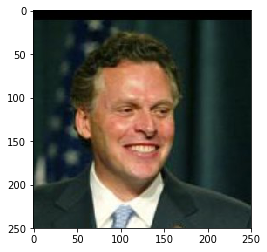

This person looks like a Collie.


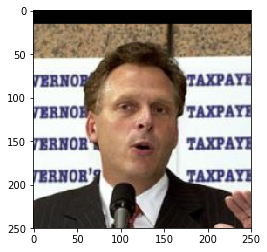

This person looks like a Collie.


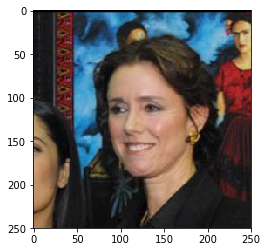

This person looks like a German shorthaired pointer.


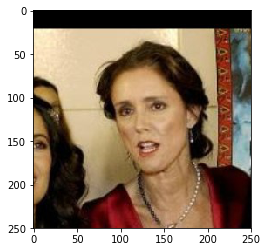

This person looks like a Basenji.


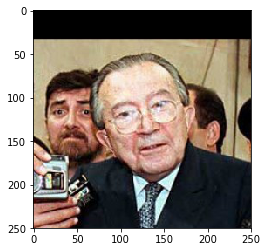

This person looks like a Basenji.


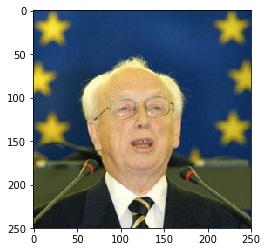

This person looks like a Basenji.


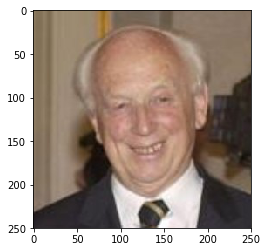

This person looks like a Chinese crested.


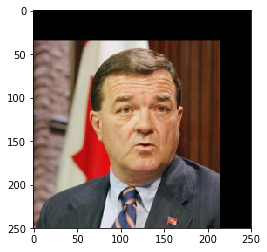

This person looks like a Dogue de bordeaux.


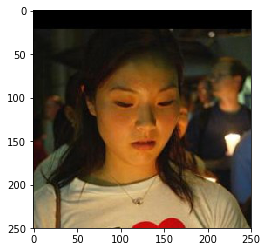

There does not seem to be any dogs or humans in this picture.


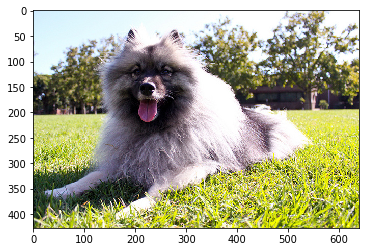

This dog is probably a Keeshond.


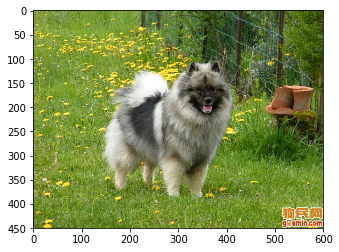

This dog is probably a Keeshond.


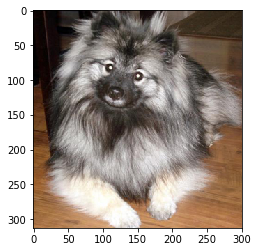

This dog is probably a Keeshond.


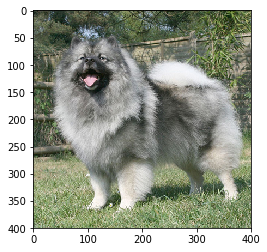

This dog is probably a Keeshond.


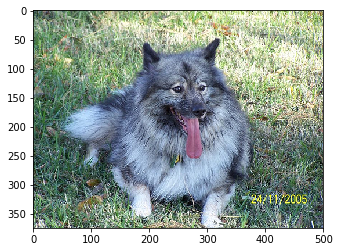

This dog is probably a Lowchen.


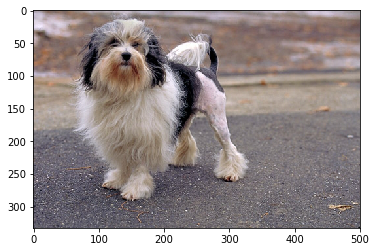

This dog is probably a Lowchen.


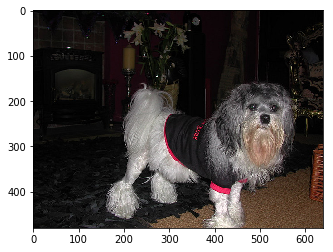

This dog is probably a Dandie dinmont terrier.


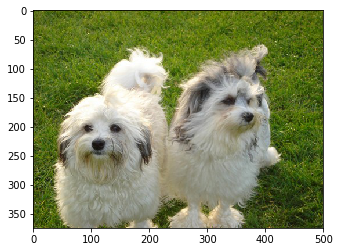

This dog is probably a Lowchen.


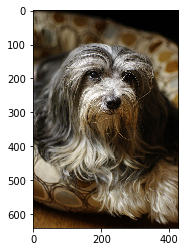

In [44]:
for file in np.hstack((human_files[-9:], dog_files[-9:])):
    run_app(file, model_transfer)

This dog is probably a Manchester terrier.


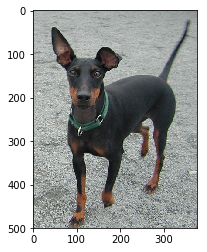

This dog is probably a Manchester terrier.


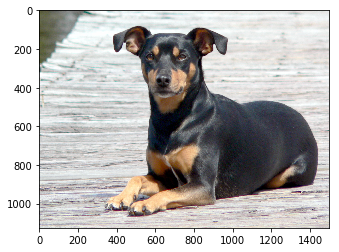

This dog is probably a Manchester terrier.


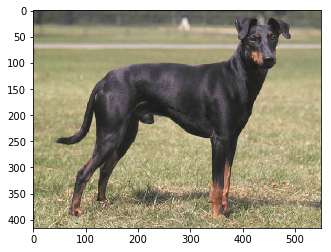

This dog is probably a Manchester terrier.


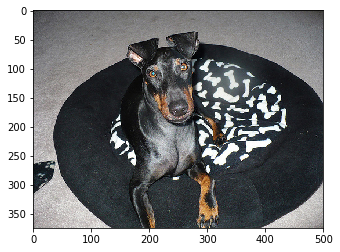

This dog is probably a Manchester terrier.


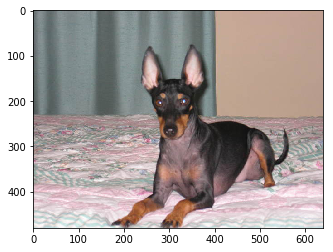

This dog is probably a Manchester terrier.


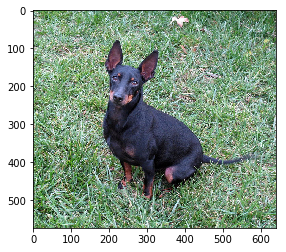

This dog is probably a Manchester terrier.


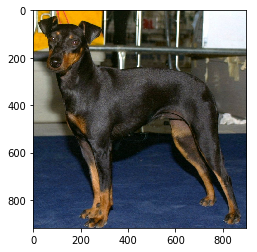

This dog is probably a Manchester terrier.


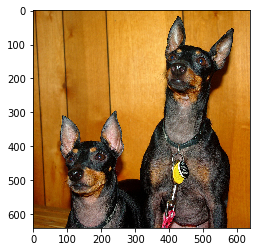

This dog is probably a Manchester terrier.


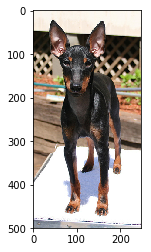

This dog is probably a Manchester terrier.


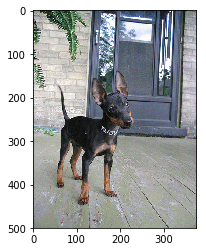

In [45]:
## From another part of the dog data (true labels Manchester terrier.)

for file in np.hstack(dog_files[997:1007]):
    
    run_app(file, model_transfer)

This person looks like a Boykin spaniel.


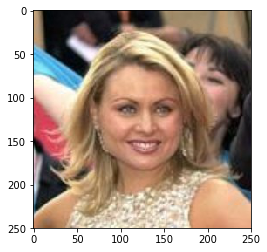

This person looks like a German wirehaired pointer.


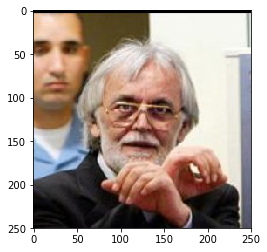

This person looks like a Basenji.


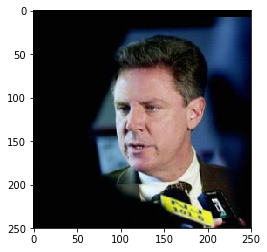

This person looks like a Boykin spaniel.


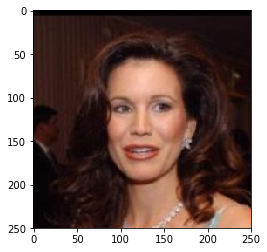

This person looks like a Chinese crested.


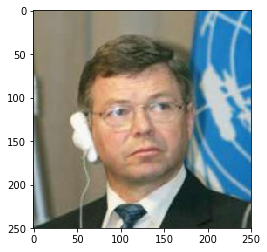

This person looks like a Pharaoh hound.


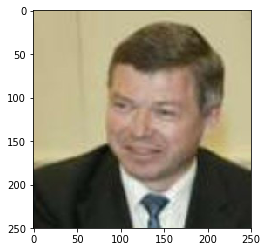

This person looks like a German wirehaired pointer.


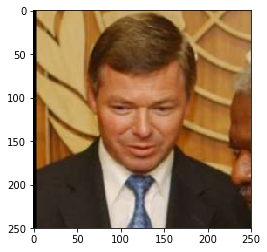

This person looks like a Xoloitzcuintli.


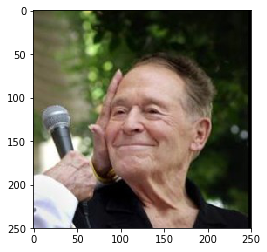

This person looks like a Chinese crested.


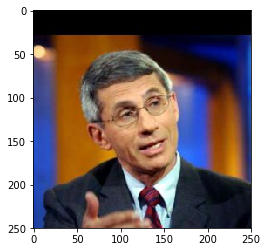

This person looks like a German wirehaired pointer.


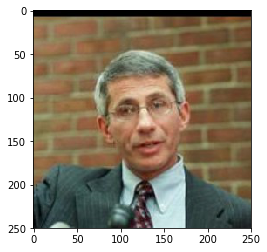

In [46]:
## From another part of the humans dataset.
for file in np.hstack(human_files[100:110]):
    run_app(file, model_transfer)

This person looks like a Nova scotia duck tolling retriever.


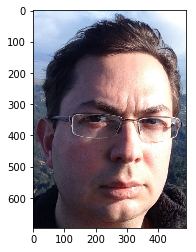

This dog is probably a Pembroke welsh corgi.


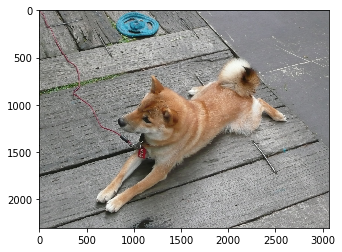

This dog is probably a Papillon.


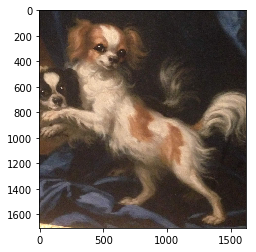

This dog is probably a Beagle.


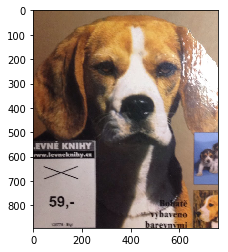

There does not seem to be any dogs or humans in this picture.


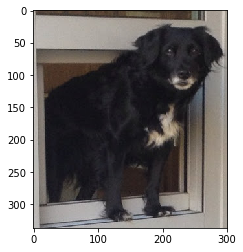

This dog is probably a American staffordshire terrier.


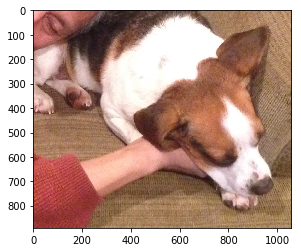

In [47]:
my_dog_paths=np.array(glob("my_dog_pictures/*"))

for my_dog_path in my_dog_paths:
       run_app(my_dog_path, model_transfer)
#run_app("my_dog_pictures/1.JPG", model_transfer)